In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import time
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import seaborn as sns
import scipy.stats as stats
from scipy.stats import gamma
from scipy.stats import ortho_group

In [2]:
def plot_results(output, variable, labels, xlabel = None, ylabel = 'Power',  xticks = None, yticks = [0,0.5,1], legend = False,  ax=None, title =None, colors = 'tab10'):
    # Use LaTeX and set font size
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('font', size=22)
    plt.rc('legend', fontsize=22)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    if ax is None:
            fig, ax = plt.subplots()

    # Define markers
    markers = [ 's', 'D', 'o', 's', 'D', 'o', 'v','^', '*', 'P', 'X']
    zorder = [len(labels) - i for i in range(len(labels))]
    from cycler import cycler
    # Set the default color cycle to ggplot style
    # plt.rcParams['axes.prop_cycle'] = cycler(color=plt.style.library['seaborn-v0_8-bright']['axes.prop_cycle'].by_key()['color'])
    default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    default_colors =  list(plt.get_cmap(colors).colors)
    default_colors[2] = 'tab:cyan'



    
    # use ggplot style default colors instead
    # repeat same color twice
    default_colors = list(itertools.chain.from_iterable(itertools.repeat(x, 2) for x in default_colors))
    linestyle = ['-']*6 + [':']*7
    linestyle = [':','-']*7
    # default_colors[5] = 'tab:cyan'
    for i in range(len(labels)):
        if output[i] is None:
            continue
        else:
            ax.plot(variable, output[i], label= str(labels[i]), 
                 marker=markers[i % len(markers)], linewidth=2, color = default_colors[i % len(default_colors)], linestyle = linestyle[i % len(linestyle)], zorder = zorder[i])
            # ax.errorbar(variable, output[i], yerr=np.std(output[i]), fmt='o', color = default_colors[i % len(default_colors)], zorder = zorder[i])

    ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Set y-ticks
    if yticks is not None:
        ax.set_yticks(yticks)
    else:
        ax.set_yticks([0,0.5,1], ['', '', ''])


    # Set x-ticks
    if xticks is not None:
        ax.set_xticks(xticks)
        # check if the xticks are floats
        if all(isinstance(x, float) for x in xticks):
            ax.set_xticklabels([f'{x:.1f}' for x in xticks])
        
    else:
        ax.set_xticks(variable)

    # Legend outside
    if legend:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_ylim(0,1)

    # Return the axes object
    return ax

def plot_results_sequential(output, variable, labels, xlabel = None, ylabel = 'Power',  xticks = None, yticks = [0,0.5,1], legend = False,  ax=None, title =None, color_sequence = 'cool'):
    # Use LaTeX and set font size
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('font', size=22)
    plt.rc('legend', fontsize=22)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    if ax is None:
            fig, ax = plt.subplots()

    # Define markers
    markers = [ 'o']*10
    zorder = [len(labels) - i for i in range(len(labels))]
    from cycler import cycler
    # Set the default color cycle to ggplot style
    # plt.rcParams['axes.prop_cycle'] = cycler(color=plt.style.library['seaborn-v0_8-bright']['axes.prop_cycle'].by_key()['color'])
    # default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']




    
    # use ggplot style default colors instead
    # repeat same color twice
    default_colors = plt.get_cmap(color_sequence)(np.linspace(0, 1, len(labels)))
    linestyle = ['-']*10
    # default_colors[5] = 'tab:cyan'
    for i in range(len(labels)):
        if output[i] is None:
            continue
        else:
            ax.plot(variable, output[i], label= str(labels[i]), 
                 marker=markers[i % len(markers)], linewidth=2, color = default_colors[i % len(default_colors)], linestyle = linestyle[i % len(linestyle)], zorder = zorder[i])
            # ax.errorbar(variable, output[i], yerr=np.std(output[i]), fmt='o', color = default_colors[i % len(default_colors)], zorder = zorder[i])

    ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Set y-ticks
    if yticks is not None:
        ax.set_yticks(yticks)
    else:
        ax.set_yticks([0,0.5,1], ['', '', ''])


    # Set x-ticks
    if xticks is not None:
        ax.set_xticks(xticks)
        # check if the xticks are floats
        if all(isinstance(x, float) for x in xticks):
            ax.set_xticklabels([f'{x:.1f}' for x in xticks])
        
    else:
        ax.set_xticks(variable)

    # Legend outside
    if legend:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_ylim(0,1)

    # Return the axes object
    return ax

def load_results(file):
    results = []
    for i in range(1,101):
        
        fname = file + str(i) + '.npz'
        resulti = np.load(fname)
        resulti = np.array([resulti[key] for key in resulti.files])
        if resulti.shape[0] <= 9: # there some mixed results with previous version with 11 outputs
            results.append(resulti)
        # results.append(resulti)
    results = np.array(results)
    # squeeze the last dimension
    results = np.squeeze(results)
    return results

(90, 9, 4)
(9, 4)


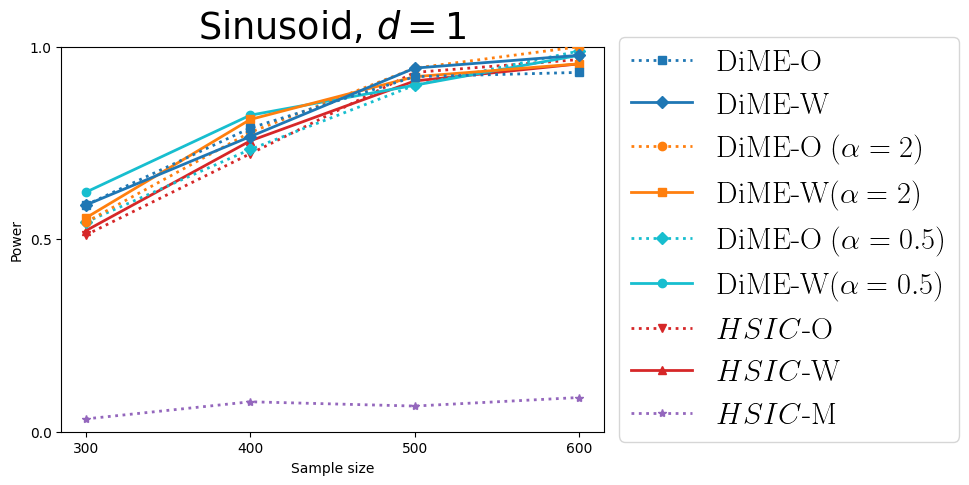

In [4]:
# load results
results = load_results('results/sinusoid') # sinusoid_ep500_
print(results.shape)
output = np.mean(results, axis=0)
print(output.shape)
labels = [r'DiME-O', r'DiME-W', r'DiME-O  ($\alpha = 2$)',r'DiME-W($\alpha = 2$)',r'DiME-O  ($\alpha = 0.5$)',r'DiME-W($\alpha = 0.5$)',r'$HSIC$-O', r'$HSIC$-W',  r'$HSIC$-M']
sample_sizes = (300, 400,500,600)
# reorder the last 3 results
output_sinusoid = np.concatenate((output[:6], output[-2:], output[6:7])) # reordering the results for easier coloring
# plot results
fig, ax = plt.subplots(1,1, figsize=(7, 5))
sinusoid = plot_results(output_sinusoid, sample_sizes, labels, xlabel='Sample size', ylabel='Power', xticks=sample_sizes, ax=ax, title=r'Sinusoid, $d=1$', legend = True)

(96, 9, 4)
(9, 4)


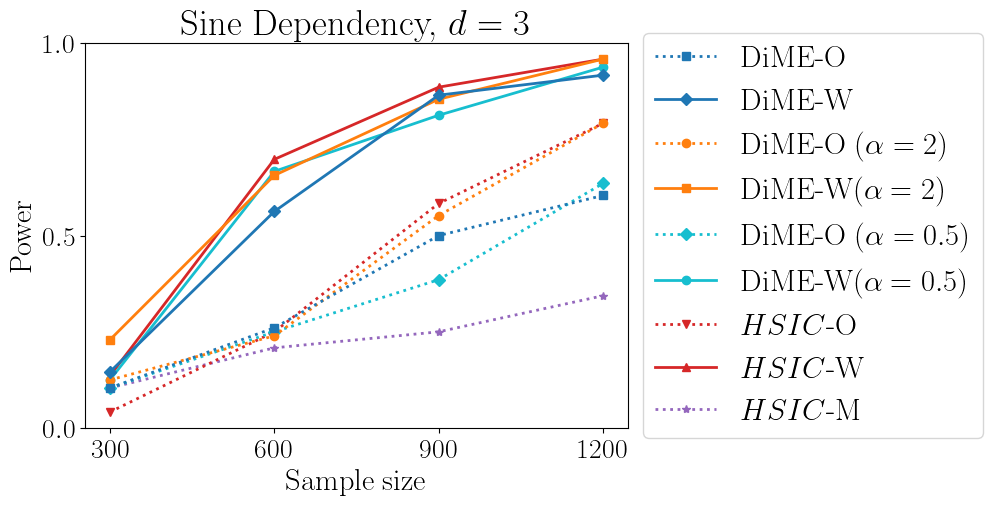

In [5]:
# load results
results = load_results('results/sine_dependence') # _ep500_
print(results.shape)
output = np.mean(results, axis=0)
print(output.shape)
sample_sizes = (300, 600,900,1200)
# reorder the last 3 results
output_sine = np.concatenate((output[:6], output[-2:], output[6:7])) # reordering the results for easier coloring
# plot results
fig, ax = plt.subplots(1,1, figsize=(7, 5))
sine = plot_results(output_sine, sample_sizes, labels, xlabel='Sample size', ylabel='Power', xticks=sample_sizes, ax=ax, title=r'Sine Dependency, $d=3$', legend = True)

(100, 9, 4)
(9, 4)


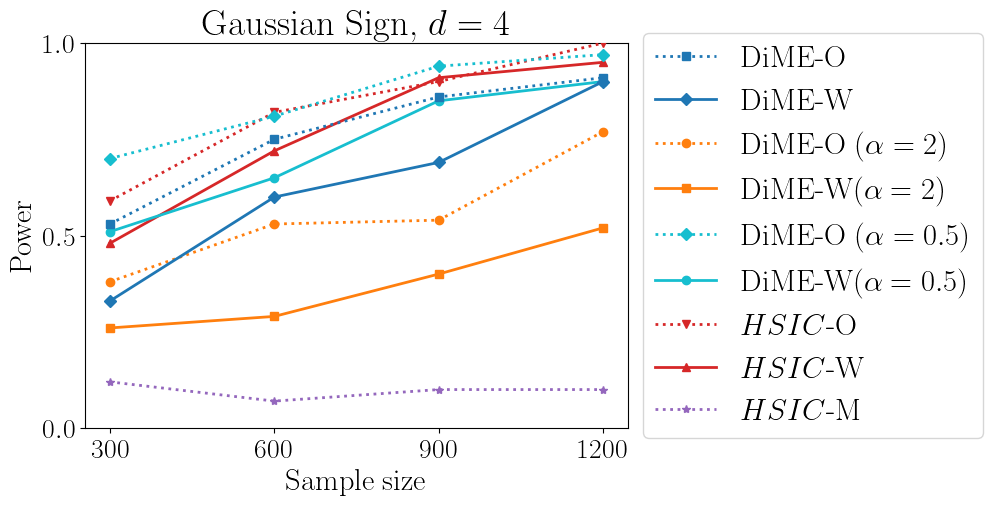

In [6]:
# load results
results = load_results('results/gaussian_sign') # _ep500_
print(results.shape)
output = np.mean(results, axis=0)
print(output.shape)
sample_sizes = (300, 600,900,1200)
# reorder the last 3 results
output_gsign = np.concatenate((output[:6], output[-2:], output[6:7])) # reordering the results for easier coloring
# plot results
fig, ax = plt.subplots(1,1, figsize=(7, 5))
gsign = plot_results(output_gsign, sample_sizes, labels, xlabel='Sample size', ylabel='Power', xticks=sample_sizes, ax=ax, title=r'Gaussian Sign,  $d=4$', legend = True)

(100, 9, 10)
(9, 10)


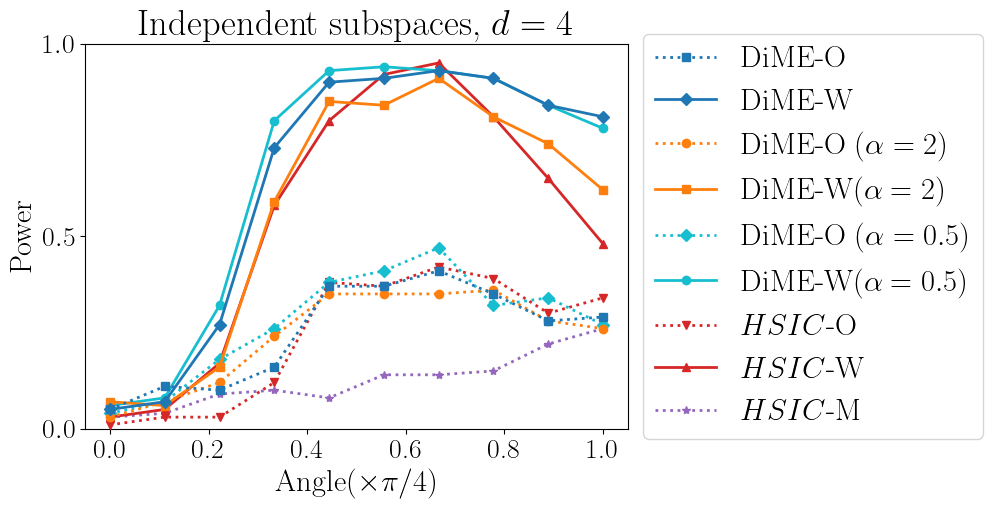

In [8]:
# load results
results = load_results('results/isa')
print(results.shape)
output = np.mean(results, axis=0)
print(output.shape)
alphas = np.linspace(0,1,10)
xticks = np.linspace(0,1,6)
# reorder the last 3 results
output_isa = np.concatenate((output[:6], output[-2:], output[6:7])) # reordering the results for easier coloring
# plot results
fig, ax = plt.subplots(1,1, figsize=(7, 5))
isa = plot_results(output_isa, alphas, labels, xlabel=r'Angle($\times \pi/4$)', ylabel='Power', xticks=xticks, ax=ax, title=r'Independent subspaces,  $d=4$', legend = True)

(100, 8, 10)
(8, 10)


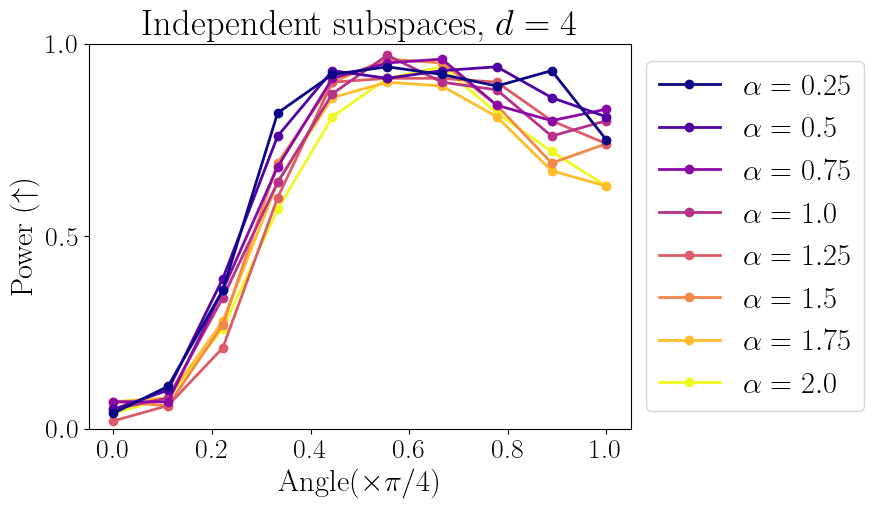

In [9]:
# load results
results = load_results('results/isa_alphas')
print(results.shape)
output = np.mean(results, axis=0)
print(output.shape)
alphas = np.linspace(0,1,10)
xticks = np.linspace(0,1,6)
# reorder the last 3 results
output_isa_alphas = output
alpha_orders = np.linspace(0.25,2.0,8)
labels = [f'$\\alpha = {alpha}$' for alpha in alpha_orders]
# plot results
fig, ax = plt.subplots(1,1, figsize=(7, 5))
isa = plot_results_sequential(output_isa_alphas, alphas, labels, xlabel=r'Angle($\times \pi/4$)', ylabel=r'Power ($\uparrow$)', xticks=xticks, ax=ax, title=r'Independent subspaces,  $d=4$', legend = True, color_sequence='plasma')
fig.savefig('figures/isa_alphas.pdf', bbox_inches='tight', dpi = 300)

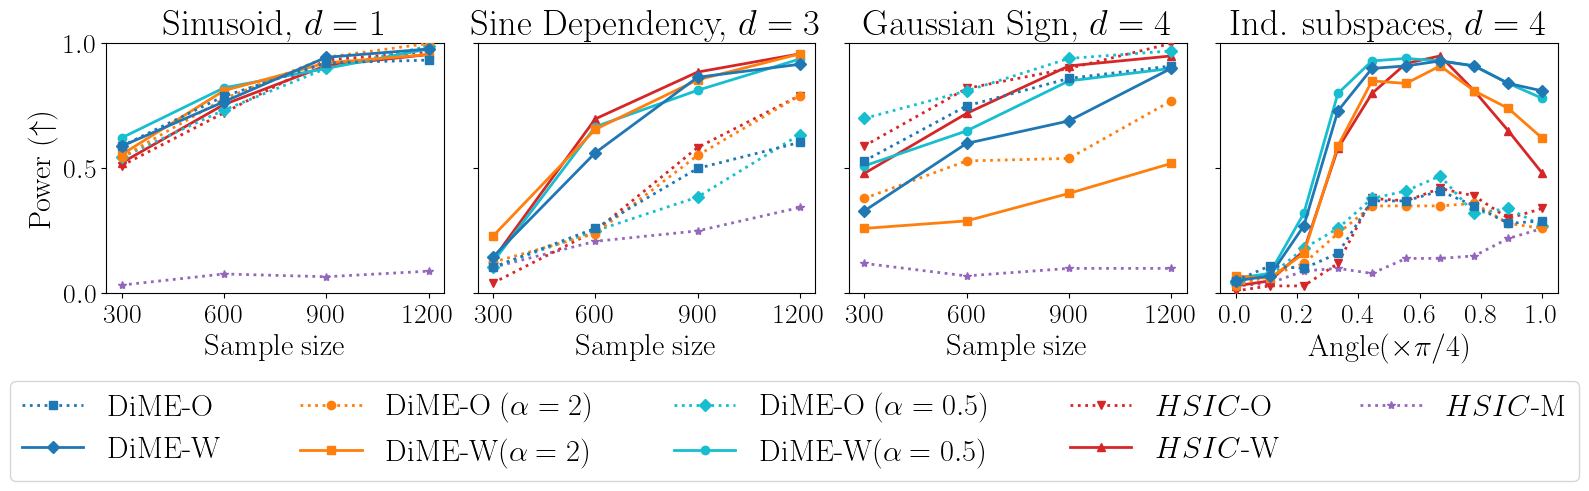

In [9]:
# Create a figure with 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4.2))

# Plot each of the existing axes into the new subplots
sample_sizes = (300, 600,900,1200)
# convert to int
sample_sizes = [int(x) for x in sample_sizes]
plot_results(output_sinusoid, sample_sizes, labels, xlabel='Sample size', ylabel=r'Power ($\uparrow$)', xticks=sample_sizes, ax=axs[0], title=r'Sinusoid, $d=1$', legend = False)
sample_sizes = (300, 600,900,1200)
sample_sizes = [int(x) for x in sample_sizes]
plot_results(output_sine, sample_sizes, labels, xlabel='Sample size', ylabel = None, yticks= None, xticks=sample_sizes, ax=axs[1],  title=r'Sine Dependency, $d=3$', legend = False)
sample_sizes = (300, 600,900,1200)
sample_sizes = [int(x) for x in sample_sizes]
plot_results(output_gsign, sample_sizes, labels, xlabel='Sample size', ylabel = None, yticks= None, xticks=sample_sizes, ax=axs[2],title=r'Gaussian Sign,  $d=4$', legend = False)
alphas = np.linspace(0,1,10)
xticks = np.linspace(0,1,6)
plot_results(output_isa, alphas, labels, xlabel=r'Angle($\times \pi/4$)', ylabel = None, yticks= None, xticks=xticks, ax=axs[3], title=r'Ind. subspaces,  $d=4$', legend = False)
# Add a legend underneath the plot with two rows and 5 columns
handles, labels = sinusoid.get_legend_handles_labels()
fig.legend(handles, labels, mode = "expand", ncol=5, bbox_to_anchor=(0., 0.0, 1., .075))
# Display the figure with its subplots
fig.tight_layout()
# save figure
fig.savefig('figures/ind_testing_benchmarks.pdf', bbox_inches='tight', dpi = 300)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


(100, 9)
[0.16 0.95 0.15 0.95 0.34 0.96 0.12 0.87 0.24]
(100, 9)
[0.04 0.04 0.1  0.07 0.07 0.04 0.05 0.02 0.02]


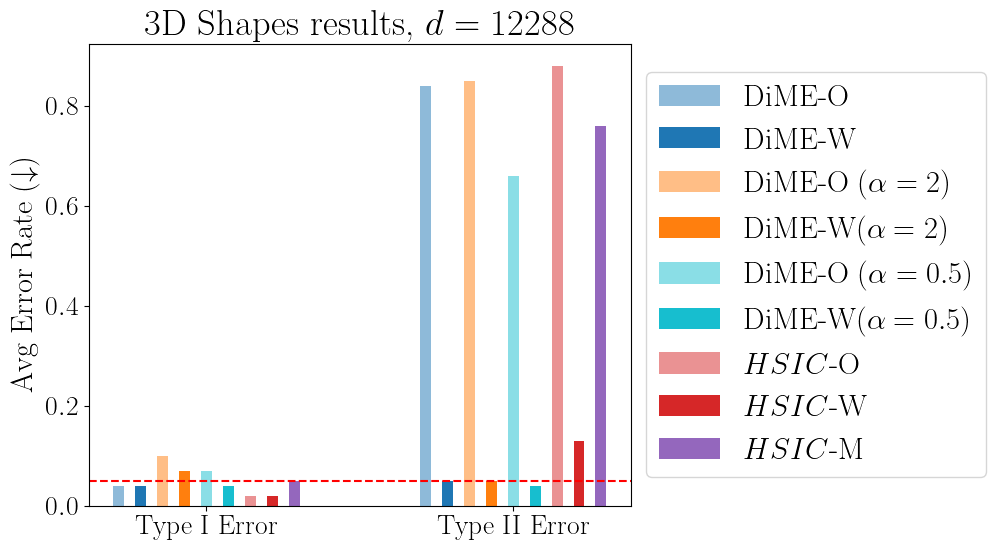

In [14]:
# load results
results = load_results('results/3dshapes_300ep') # 3dshapes'
print(results.shape)
output = np.mean(results, axis=0)
# reorder the last 3 results
output = np.concatenate((output[:6], output[-2:], output[6:7])) # reordering the results for easier coloring
print(output)
typeII_error= 1 - output
# load results
results = load_results('results/3dshapes_typeI')
print(results.shape)
output = np.mean(results, axis=0)
print(output)
# reorder the last 3 results
output = np.concatenate((output[:6], output[-2:], output[6:7])) # reordering the results for easier coloring
typeI_error = output
# make a bar plot
import matplotlib.pyplot as plt
import numpy as np

# Number of categories
n_categories = len(labels)

# Bar width
bar_width = 0.35

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=22)
plt.rc('legend', fontsize=22)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
# Sample data
categories = labels

# Number of categories
n_categories = len(categories)

# Bar width
bar_width = 0.5

# Positions of the bars on the x-axis
r1 = np.arange(n_categories)
r2 = np.arange(n_categories + 5 , 2 * n_categories +5)

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))

# Plotting the bars
# Colors from tab10 palette
colors = list(plt.get_cmap('tab10').colors)
colors[2] = 'tab:cyan'
# repeat same color twice
colors = list(itertools.chain.from_iterable(itertools.repeat(x, 2) for x in colors))
# create alphas for the bars to distinguish between O and W
alphas = [0.5, 1]*n_categories
bars1 = ax.bar(r1, typeI_error, color=colors[:n_categories], width=bar_width, label='Type I Error')
bars2 = ax.bar(r2, typeII_error, color=colors[:n_categories], width=bar_width, label='Type II Error')
# Set individual alpha for each bar
for bar, label in zip(bars1, labels):
    if 'O' in label:
        bar.set_alpha(0.5)  # Lighter color for methods with label 'O'
    else:
        bar.set_alpha(1.0)  # Default color for methods with label 'W'
for bar, label in zip(bars2, labels):
    if 'O' in label:
        bar.set_alpha(0.5)  # Lighter color for methods with label 'O'
    else:
        bar.set_alpha(1.0)  # Default color for methods with label 'W'
# Adding labels
ax.set_ylabel(r'Avg Error Rate ($\downarrow$)')
ax.set_xticks(np.array([4, 18]))
# xticks are type I and type II error
ax.set_xticklabels(['Type I Error', 'Type II Error'])
# ax.set_xticks([])

# Adding legend
ax.legend(bars1, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# horizontal bar at 0.05
ax.axhline(y=0.05, color='r', linestyle='--')
ax.set_title(r'3D Shapes results, $d = 12288$')
fig.savefig('figures/3dshapes_error_rates.pdf', bbox_inches='tight', dpi = 300)
# Show plot
plt.show()

(100, 9)
[0.16 0.95 0.15 0.95 0.34 0.96 0.24 0.04 0.11]


[]

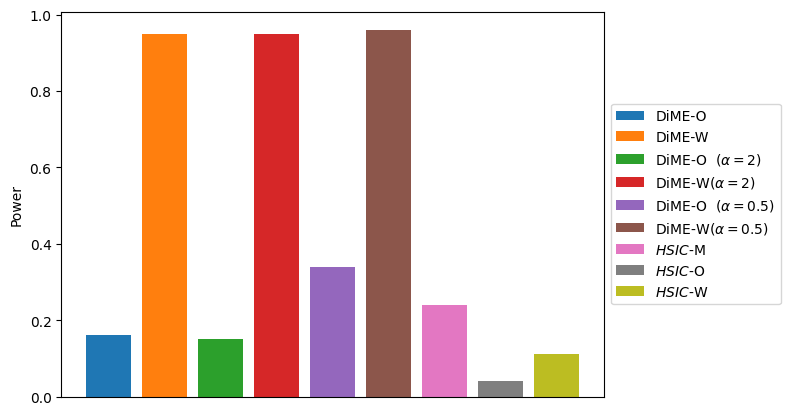

In [5]:
# load results
results = load_results('results/3dshapes')
print(results.shape)
labels = [r'DiME-O', r'DiME-W', r'DiME-O  ($\alpha = 2$)',r'DiME-W($\alpha = 2$)',r'DiME-O  ($\alpha = 0.5$)',r'DiME-W($\alpha = 0.5$)', r'$HSIC$-M',r'$HSIC$-O', r'$HSIC$-W']
output = np.mean(results, axis=0)
print(output)
typeII = output
# make a bar plot
fig, ax = plt.subplots(1,1, figsize=(7, 5))
# bar plot
colors = sns.color_palette('tab10', len(labels)) 
bars = ax.bar(labels, output, color=colors)
ax.set_ylabel('Power')
# remove x ticks 
# manually add legend
ax.legend(bars, labels, loc='center left', bbox_to_anchor=(1, 0.5))
# horizontal bar at 0.05
# ax.axhline(y=0.05, color='r', linestyle='--')
ax.set_xticks([])